In [1]:
VERSION

v"1.8.0-DEV.71"

In [2]:
using Plots
using Zygote

In [3]:
meshgrid(x, y) = reim(complex.(x', y))

x = 1:4
y = 10(1:3)
X, Y = meshgrid(x, y)
display(X)
display(Y)

3×4 Matrix{Int64}:
 1  2  3  4
 1  2  3  4
 1  2  3  4

3×4 Matrix{Int64}:
 10  10  10  10
 20  20  20  20
 30  30  30  30

In [4]:
function vf!(x, y, f; scale=1, kwargs...)
    X, Y = meshgrid(x, y)
    u(x, y) = scale * f(x, y)[1]
    v(x, y) = scale * f(x, y)[2]
    U = u.(X, Y)
    V = v.(X, Y)
    X -= U/2
    Y -= V/2
    quiver!(vec(X), vec(Y); quiver = (vec(U), vec(V)), kwargs...)
end

vf(x, y, f; kwargs...) = (plot(); vf!(x, y, f; kwargs...))

vf (generic function with 1 method)

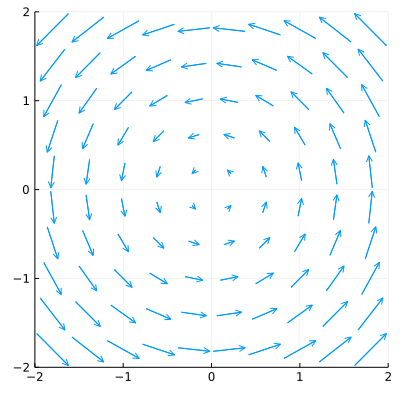

In [5]:
g(x, y) = (-y, x)
x = y = range(-2, 2, length=21)[2:2:end]
vf(x, y, g; scale=0.2, size=(400, 400))
plot!(xlim=(-2, 2), ylim=(-2, 2))

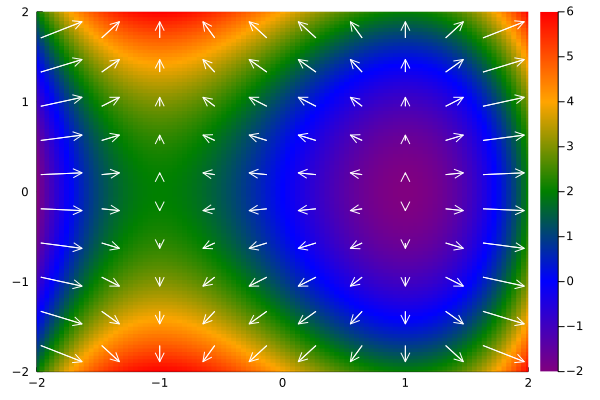

In [6]:
f(x, y) = x^3 - 3x + y^2
df(x, y) = gradient(f, x, y)
xs = ys = range(-2, 2, length=101)
heatmap(xs, ys, f; color=:rainbow)
x = y = range(-2, 2, length=21)[2:2:end]
vf!(x, y, df; scale=0.05, color=:white)
plot!(xlim=extrema(xs), ylim=extrema(ys))